In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = "/content/drive/MyDrive/NorthFinal/"

# Подготовка данных для моделей первой группы

In [369]:
import pandas as pd
import matplotlib.pyplot as plt

In [370]:
val = pd.read_excel(PATH + '1кв2021_1.xlsx')

In [371]:
val.head()

,БЕ,Период,Расчет ликвидности - дата,Сумма в валюте транзакции
0,0,1,12.01.2021,-8.528939e+07
1,0,1,14.01.2021,-5.384866e+03
2,0,1,19.01.2021,-3.569336e+08
3,0,1,21.01.2021,-3.991818e+06
4,0,1,26.01.2021,-9.829978e+08


In [372]:
val = val.drop(['Период'], axis = 1)

In [373]:
val = val.loc[val['БЕ'] == 5].drop(['БЕ'], axis = 1)

In [374]:
val['Расчет ликвидности - дата'] = pd.to_datetime(val['Расчет ликвидности - дата'])
val['Расчет ликвидности - дата']  = val['Расчет ликвидности - дата'].apply(lambda x:x.toordinal())
val['Расчет ликвидности - дата']  = val['Расчет ликвидности - дата'] - 736329

In [375]:
train = pd.read_csv(PATH + 'train.csv')
train = train.loc[train['БЕ'] == 5].drop(['БЕ'], axis = 1)

In [376]:
train['Дата транзакции'] = pd.to_datetime(train['Дата транзакции'])
train['Дата транзакции']  = train['Дата транзакции'].apply(lambda x:x.toordinal())
train['Дата транзакции']  = train['Дата транзакции'] - 736329

In [377]:
val = val.rename({'Расчет ликвидности - дата': 'Дата транзакции', 'Сумма в валюте транзакции': 'Сумма в RUB'}, axis='columns')

In [378]:
val

,Дата транзакции,Сумма в RUB
67,1474,-6.501732e+07
68,1481,-7.279720e+07
69,1488,-2.388045e+07
70,1736,-6.375853e+07
71,1509,-6.619521e+07
72,1516,-2.428283e+07
73,1737,-6.191757e+07
74,1537,-7.141276e+07
75,1544,-1.632036e+07
76,1551,-2.198931e+06


In [379]:
train = pd.concat([train, val])

In [380]:
train

,Дата транзакции,Сумма в RUB
0,11,-4.416300e+07
1,18,-2.960046e+07
2,25,-4.189707e+07
3,39,-2.098554e+07
4,46,-4.373594e+07
...,...,...
72,1516,-2.428283e+07
73,1737,-6.191757e+07
74,1537,-7.141276e+07
75,1544,-1.632036e+07


In [381]:
for i in range(1, len(train)):
  for j in range(int(train['Дата транзакции'][i - 1]) + 1, int(train['Дата транзакции'][i])):
    new_row = {'Дата транзакции': j, 'Сумма в RUB' : 0}
    train = train.append(new_row, ignore_index=True)

In [386]:
for j in range(1,11):
    new_row = {'Дата транзакции': j, 'Сумма в RUB' : 0}
    train = train.append(new_row, ignore_index=True)

In [390]:
train = train.sort_values(by='Дата транзакции', ascending=True)

In [391]:
train = train.reset_index().drop(['index'], axis = 1)

In [392]:
train = train['Сумма в RUB'].reset_index().drop(['index'], axis = 1)

In [393]:
train.tail

<bound method NDFrame.tail of        Сумма в RUB
0     0.000000e+00
1     0.000000e+00
2     0.000000e+00
3     0.000000e+00
4     0.000000e+00
...            ...
1975  0.000000e+00
1976  0.000000e+00
1977  0.000000e+00
1978 -6.375853e+07
1979 -6.191757e+07

[1980 rows x 1 columns]>

In [360]:
train.tail(30)

,Сумма в RUB
1950,0.000000e+00
1951,0.000000e+00
1952,0.000000e+00
1953,0.000000e+00
1954,0.000000e+00
1955,0.000000e+00
1956,0.000000e+00
1957,0.000000e+00
1958,0.000000e+00
1959,0.000000e+00


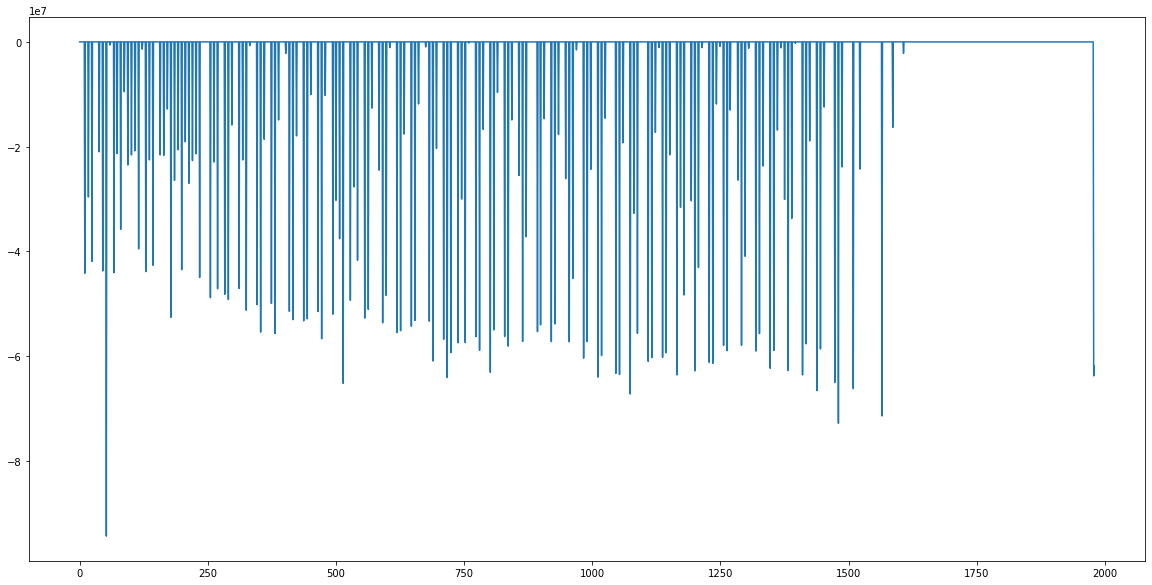

In [359]:
plt.figure(figsize=(20,10))

plt.plot(train['Сумма в RUB'])

In [ ]:
train.tail()

,Дата транзакции,Сумма в RUB
1276,1455,0.000000
1277,1456,0.000000
1278,1457,0.000000
1279,1458,0.000000
1280,1460,-1924.509554


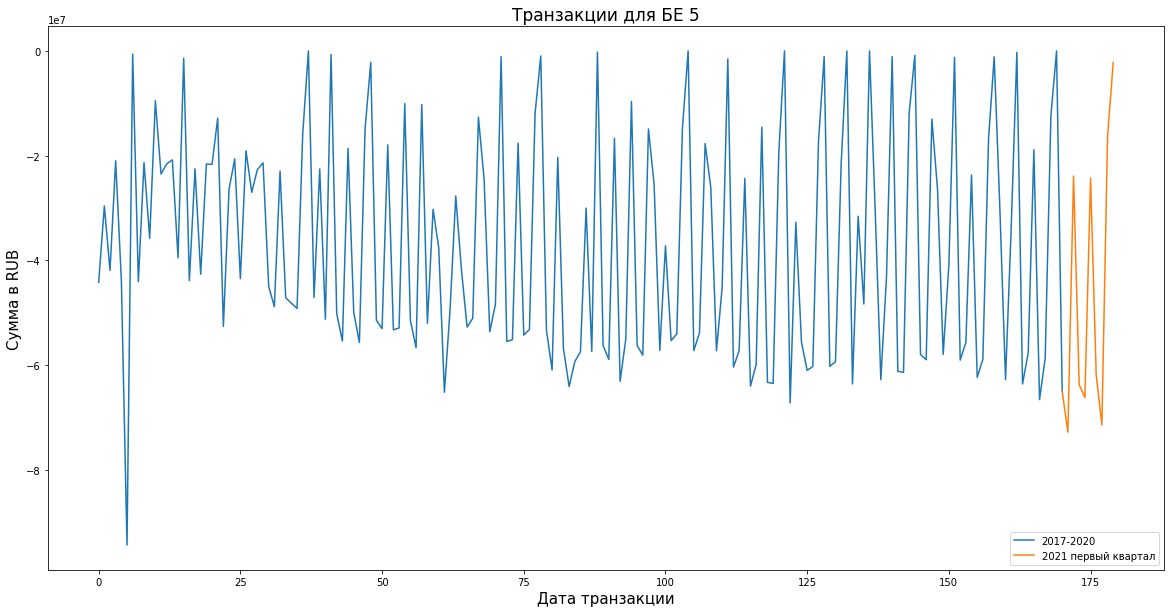

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(len(train) + 1), train.append({'Сумма в RUB':val['Сумма в валюте транзакции'][67]}, ignore_index=True), label='2017-2020')
plt.plot(range(len(train), len(train) + len(val)), val, label='2021 первый квартал')
plt.xlabel('Дата транзакции', fontsize=15)
plt.ylabel('Сумма в RUB', fontsize=15)
plt.title('Транзакции для БЕ 5', fontsize=17)
plt.legend()
plt.show()

# Скользящее среднее


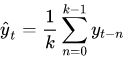

In [ ]:
def plotMovingAverage(series, n):
    rolling_mean = series.rolling(window=n).mean()
    #доверительные интервалы для сглаженных значений
    rolling_std =  series.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = rolling_mean-1.96*rolling_std
    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")
    plt.plot(dataset[n:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

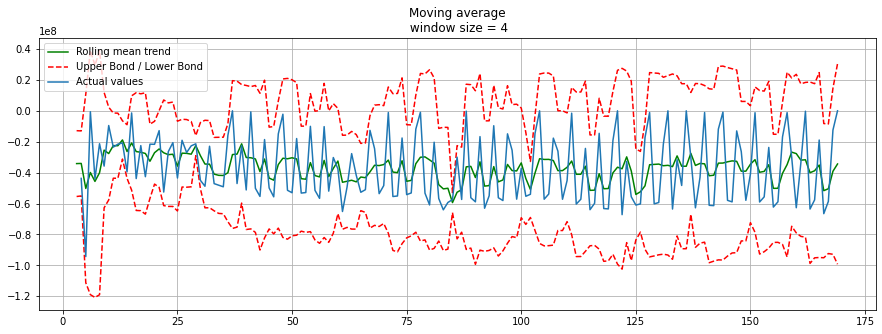

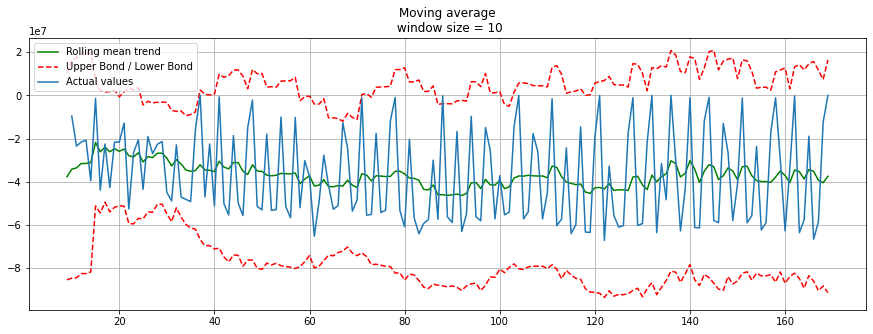

In [ ]:
plotMovingAverage(dataset, 4)
plotMovingAverage(dataset, 10)

# Экспоненциальное сглаживание, модель Хольта-Винтерса


image.png

In [ ]:
def exponential_smoothing(series, alpha):
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

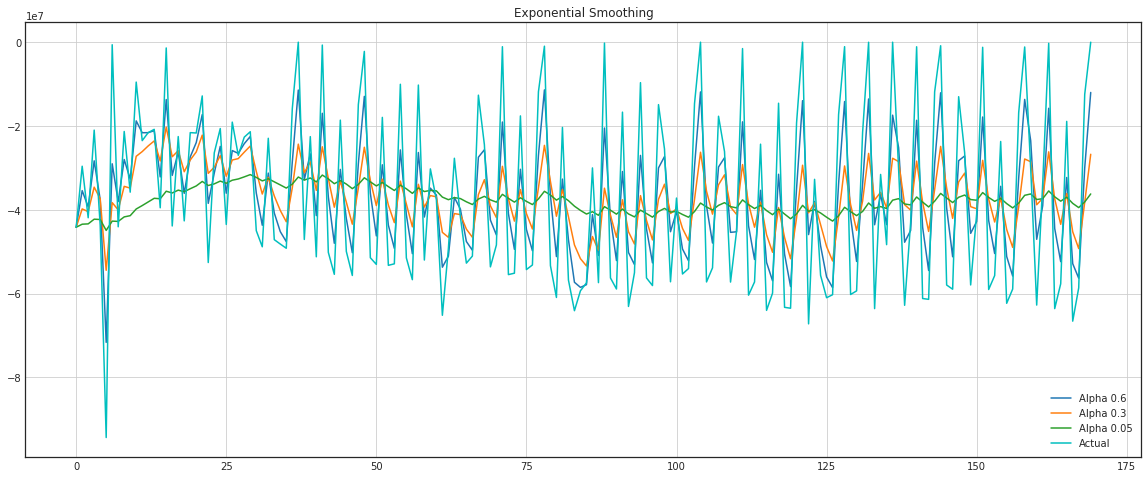

In [ ]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.6, 0.3, 0.05]:
        plt.plot(exponential_smoothing(dataset['Сумма в RUB'], alpha), label="Alpha {}".format(alpha))
    plt.plot(dataset['Сумма в RUB'].values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True)

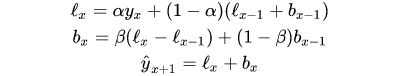

In [ ]:
def double_exponential_smoothing(series, alpha, beta):
    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # прогнозируем
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha*value + (1-alpha)*(level+trend)
        trend = beta*(level-last_level) + (1-beta)*trend
        result.append(level+trend)
    return result

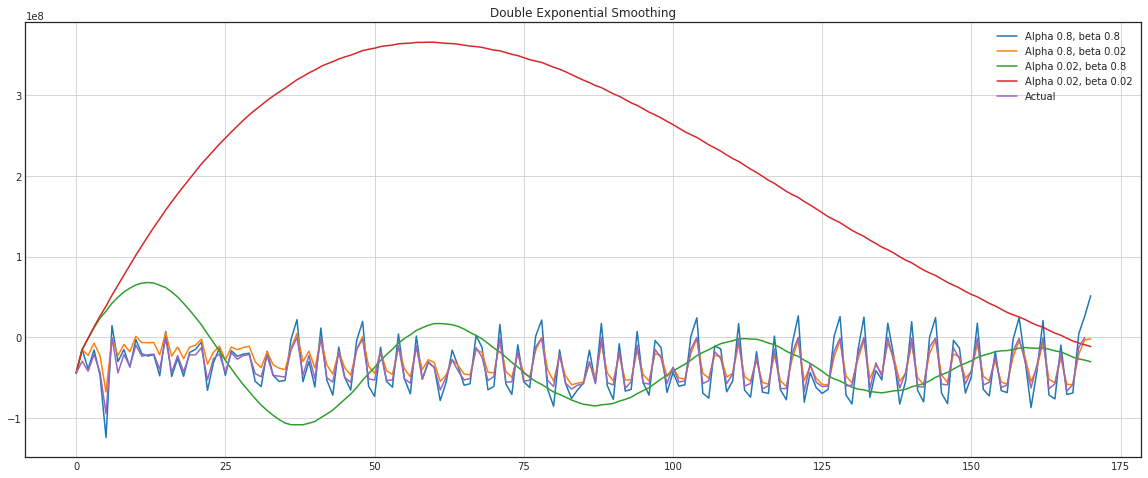

In [ ]:
with plt.style.context('seaborn-white'):    
    plt.figure(figsize=(20, 8))
    for alpha in [0.8, 0.02]:
        for beta in [0.8, 0.02]:
            plt.plot(double_exponential_smoothing(dataset['Сумма в RUB'], alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(dataset['Сумма в RUB'].values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

def timeseriesCVscore(x):
    errors = []

    values = data.values
    alpha, beta, gamma = x

    tscv = TimeSeriesSplit(n_splits=3) 

    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen = 6, alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()

        predictions = model.result[-len(test):]
        actual = values[test]
        error = mean_squared_error(predictions, actual)
        errors.append(error)

    return np.mean(np.array(errors))

In [ ]:
%%time
data = dataset['Сумма в RUB'][:-30] 

x = [0, 0, 0] 

opt = minimize(timeseriesCVscore, x0=x, method="TNC", bounds = ((0, 1), (0, 1), (0, 1)))

alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)


0.08858800010966755 0.09289276396341961 0.0846525935451185
CPU times: user 1.51 s, sys: 50.7 ms, total: 1.56 s
Wall time: 1.5 s


In [ ]:
data = dataset['Сумма в RUB']
model = HoltWinters(data[:-10], slen = 20, alpha = alpha_final, beta = beta_final, gamma = gamma_final, n_preds = 10, scaling_factor = 2.56)
model.triple_exponential_smoothing()

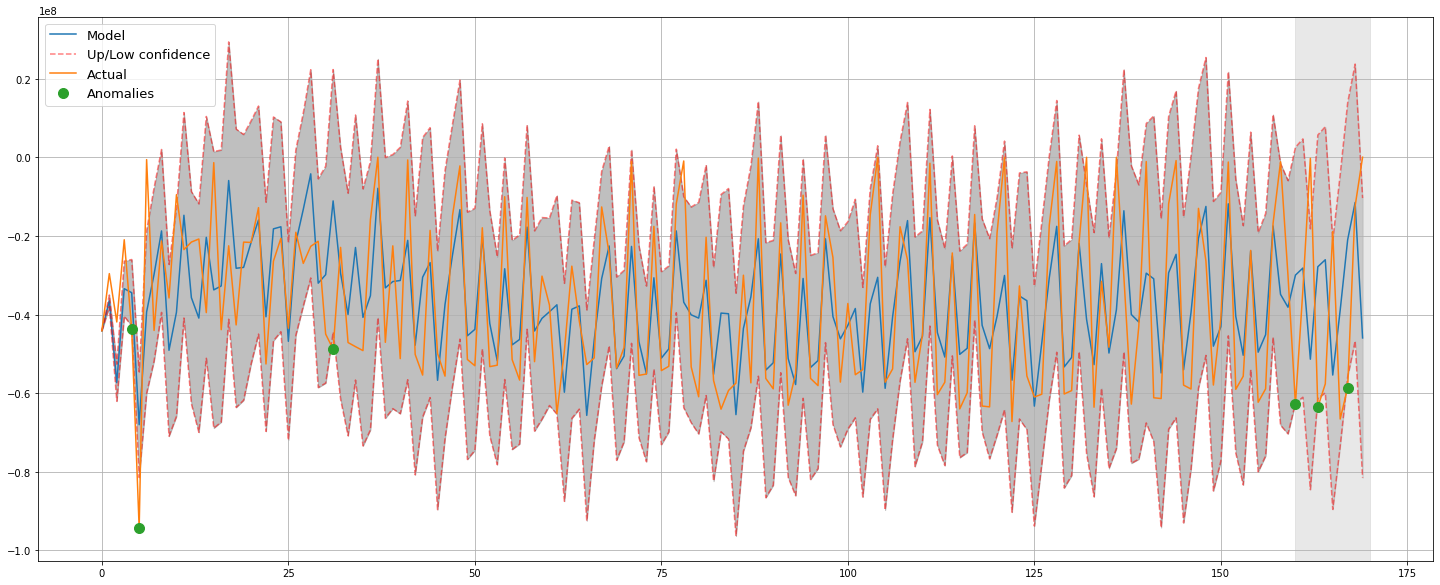

In [ ]:
def plotHoltWinters():
    Anomalies = np.array([np.NaN]*len(data))
    Anomalies[data.values<model.LowerBond] = data.values[data.values<model.LowerBond]
    plt.figure(figsize=(25, 10))
    plt.plot(model.result, label = "Model")
    plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Up/Low confidence")
    plt.plot(model.LowerBond, "r--", alpha=0.5)
    plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, y2=model.LowerBond, alpha=0.5, color = "grey")
    plt.plot(data.values, label = "Actual")
    plt.plot(Anomalies, "o", markersize=10, label = "Anomalies")
    plt.axvspan(len(data)-10, len(data), alpha=0.5, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=13);

plotHoltWinters()



# SARIMA

In [394]:
train['Сумма в RUB']

0       0.000000e+00
1       0.000000e+00
2       0.000000e+00
3       0.000000e+00
4       0.000000e+00
            ...     
1975    0.000000e+00
1976    0.000000e+00
1977    0.000000e+00
1978   -6.375853e+07
1979   -6.191757e+07
Name: Сумма в RUB, Length: 1980, dtype: float64

In [395]:
dataplus = train.copy() * -1

In [396]:
dataplus.head()

,Сумма в RUB
0,-0.0
1,-0.0
2,-0.0
3,-0.0
4,-0.0


Критерий Дики-Фуллера: p=0.000000


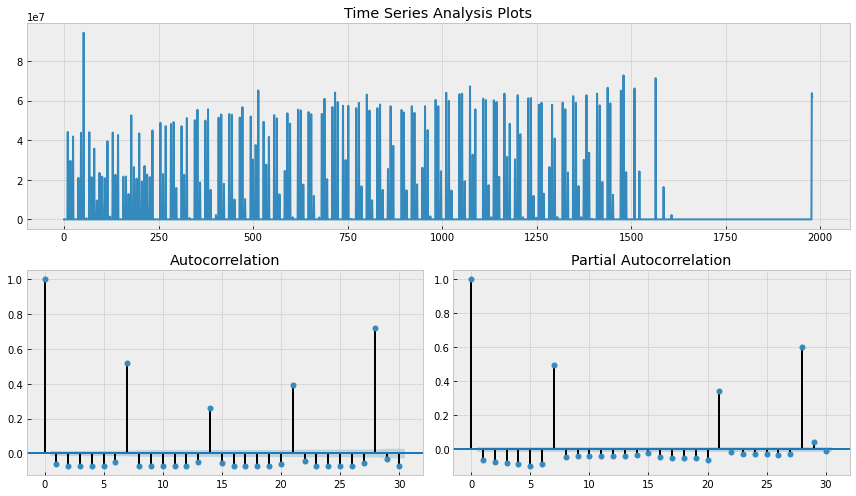

In [397]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

        print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

tsplot(dataplus['Сумма в RUB'], lags=30)

Критерий Дики-Фуллера: p=0.000001
Оптимальный параметр преобразования Бокса-Кокса: -0.653692


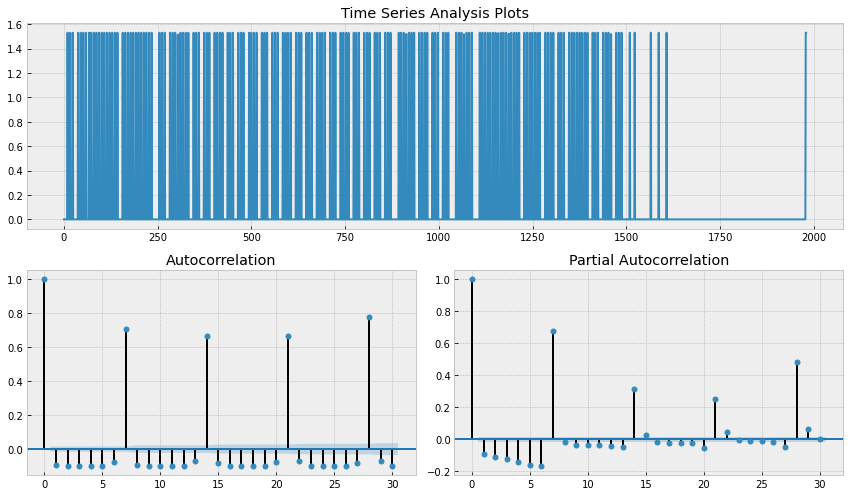

In [398]:
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

data = dataplus.copy()
data['Users_box'], lmbda = scs.boxcox(data['Сумма в RUB']+1)
tsplot(data.Users_box, lags=30)
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)

Критерий Дики-Фуллера: p=0.000000


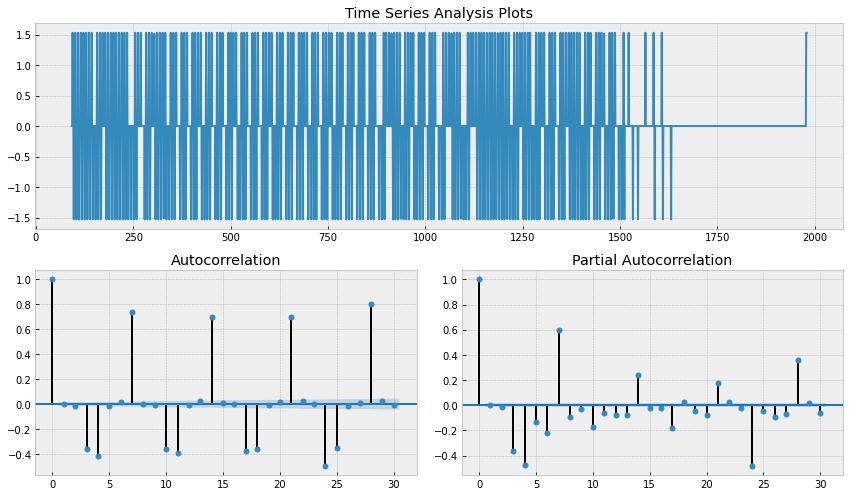

In [399]:
data['Users_box_season'] = data['Users_box'] - data['Users_box'].shift(24)
tsplot(data.Users_box_season[92:], lags=30)

Критерий Дики-Фуллера: p=0.000000


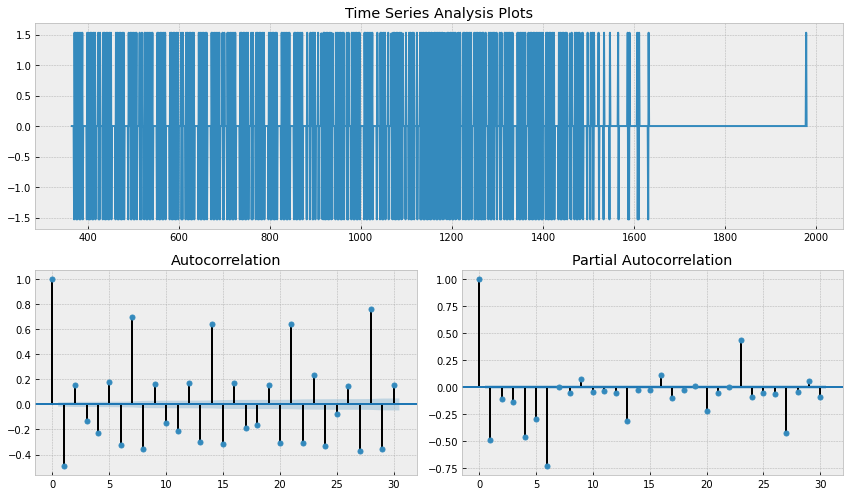

In [400]:
data['Users_box_season_diff'] = data['Users_box_season'] - data['Users_box_season'].shift(1)
tsplot(data.Users_box_season_diff[365:], lags=30)

In [401]:
ps = range(0, 3)
d=1
qs = range(0, 2)
Ps = range(0, 2)
D=1
Qs = range(0, 1)

from itertools import product

parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

12

In [402]:
%%time
results = []
best_aic = float("inf")

for param in tqdm(parameters_list):
    model=sm.tsa.statespace.SARIMAX(data.Users_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 24)).fit(disp=-1)
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

warnings.filterwarnings('default')

result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

100%|██████████| 12/12 [03:08<00:00, 15.74s/it]

      parameters          aic
11  (2, 1, 1, 0)  3182.298936
7   (1, 1, 1, 0)  3199.300716
3   (0, 1, 1, 0)  3325.533167
2   (0, 1, 0, 0)  3891.172097
6   (1, 1, 0, 0)  3893.127227
CPU times: user 3min 24s, sys: 1min 48s, total: 5min 12s
Wall time: 3min 8s


In [403]:
%%time
best_model = sm.tsa.statespace.SARIMAX(data.Users_box, order=(4, d, 3), 
                                        seasonal_order=(4, D, 1, 24)).fit(disp=-1)
print(best_model.summary())     

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                          Users_box   No. Observations:                 1980
Model:             SARIMAX(4, 1, 3)x(4, 1, 1, 24)   Log Likelihood                -782.045
Date:                            Sat, 19 Mar 2022   AIC                           1590.090
Time:                                    16:35:30   BIC                           1662.606
Sample:                                         0   HQIC                          1616.747
                                           - 1980                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6492      0.049    -13.175      0.000      -0.746      -0.553
ar.L2          0.1642      0.049   

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:53: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lags = lags.astype(np.float)
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:53: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lags = lags.astype(np.float)


Критерий Дики-Фуллера: p=0.000000


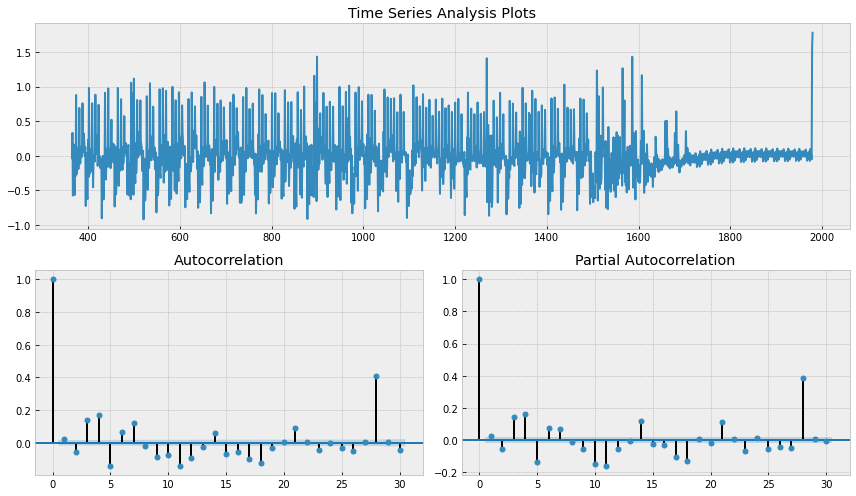

In [406]:
tsplot(best_model.resid[365:], lags=30)


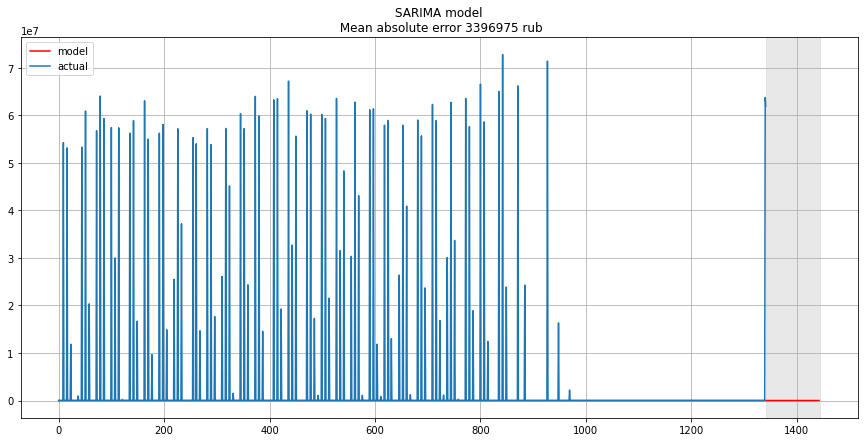

In [409]:
data["arima_model"] = invboxcox(best_model.fittedvalues, lmbda)
forecast = invboxcox(best_model.predict(start = data.shape[0], end = data.shape[0]+100), lmbda)
forecast = data.arima_model.append(forecast).values[638:]
actual = data['Сумма в RUB'].values[638:]
plt.figure(figsize=(15, 7))
plt.plot(forecast, color='r', label="model")
plt.title("SARIMA model\n Mean absolute error {} rub".format(round(mean_absolute_error(data.dropna()['Сумма в RUB'], data.dropna().arima_model))))
plt.plot(actual, label="actual")
plt.legend()
plt.axvspan(len(actual), len(forecast), alpha=0.5, color='lightgrey')
plt.grid(True)


In [ ]:
forecast

In [ ]:
actual

# Подготовка данных для моделей второй группы

In [ ]:
import pandas as pd
data = pd.read_csv(PATH + 'train.csv')

In [ ]:
new_df = data['Дата транзакции'].str.split('-',expand=True)
data = pd.concat([data,new_df], axis = 1)
data.rename(columns={0: 'year', 1: 'month', 2: 'day'}, inplace=True)

In [ ]:
def quantityPerCategory(col):
  new_col = [1]
  j = 2
  for i in range(1, len(list(data[col]))):
    if data[col][i] == data[col][i - 1]:
      new_col.append(j)
      j += 1
    else:
      new_col.append(1)
      j = 2
  return new_col

In [ ]:
data = pd.concat([data, pd.Series(quantityPerCategory('day'))], axis = 1)
data.rename(columns={0: 'quantityPerDay'}, inplace = True)
data = pd.concat([data, pd.Series(quantityPerCategory('month'))], axis = 1)
data.rename(columns={0: 'quantityPerMonth'}, inplace = True)
data = pd.concat([data, pd.Series(quantityPerCategory('year'))], axis = 1)
data.rename(columns={0: 'quantityPerYear'}, inplace = True)
new_col = []
for i in range(len(list(data['month']))):
  if data['month'][i] in ['01', '02', '03']:
    new_col.append(1)
  if data['month'][i] in ['04', '05', '06']:
    new_col.append(2)
  if data['month'][i] in ['07', '08', '09']:
    new_col.append(3)
  if data['month'][i] in ['10', '11', '12']:
    new_col.append(4)
data = pd.concat([data, pd.Series(new_col)], axis = 1)
data.rename(columns={0: 'Quarter'}, inplace = True)

In [ ]:
data.head(15)

,БЕ,Дата транзакции,Сумма в RUB,year,month,day,quantityPerDay,quantityPerMonth,quantityPerYear,Quarter
0,5,2017-01-11,-4.416300e+07,2017,01,11,1,1,1,1
1,5,2017-01-18,-2.960046e+07,2017,01,18,1,2,2,1
2,5,2017-01-25,-4.189707e+07,2017,01,25,1,3,3,1
3,5,2017-02-08,-2.098554e+07,2017,02,08,1,1,4,1
4,5,2017-02-15,-4.373594e+07,2017,02,15,1,2,5,1
5,5,2017-02-22,-9.434364e+07,2017,02,22,1,3,6,1
6,5,2017-03-01,-6.101577e+05,2017,03,01,1,1,7,1
7,5,2017-03-09,-4.405284e+07,2017,03,09,1,2,8,1
8,5,2017-03-15,-2.131114e+07,2017,03,15,1,3,9,1
9,5,2017-03-22,-3.578870e+07,2017,03,22,1,4,10,1


In [ ]:
data = pd.get_dummies(data, columns = ['year', 'month', 'quantityPerMonth', 'Quarter'])

In [ ]:
data.head()

,БЕ,Дата транзакции,Сумма в RUB,day,quantityPerDay,quantityPerYear,year_2017,year_2018,year_2019,year_2020,...,quantityPerMonth_7,quantityPerMonth_8,quantityPerMonth_9,quantityPerMonth_10,quantityPerMonth_11,quantityPerMonth_12,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,5,2017-01-11,-4.416300e+07,11,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5,2017-01-18,-2.960046e+07,18,1,2,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5,2017-01-25,-4.189707e+07,25,1,3,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,5,2017-02-08,-2.098554e+07,08,1,4,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,5,2017-02-15,-4.373594e+07,15,1,5,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Линейные модели

LAMA


In [ ]:
!pip install -U lightautoml

     |████████████████████████████████| 294 kB 4.9 MB/s 
     |████████████████████████████████| 1.2 MB 54.7 MB/s 
     |████████████████████████████████| 804.1 MB 2.5 kB/s 
     |████████████████████████████████| 76.1 MB 56 kB/s 
     |████████████████████████████████| 212 kB 64.9 MB/s 
     |████████████████████████████████| 425 kB 43.4 MB/s 
     |████████████████████████████████| 308 kB 53.4 MB/s 
     |████████████████████████████████| 2.8 MB 31.5 MB/s 
     |████████████████████████████████| 81 kB 8.7 MB/s 
     |████████████████████████████████| 210 kB 42.0 MB/s 
     |████████████████████████████████| 78 kB 5.8 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
     |████████████████████████████████| 113 kB 55.3 MB/s 
     |████████████████████████████████| 150 kB 42.8 MB/s 
     |████████████████████████████████| 21.0 MB 1.3 MB/s 
     |████████████████████████████████| 23.2 MB 1.3 MB/s 
     |████████████████████████████████| 23.3 MB 1.6 MB/s 
     |███████████████

In [ ]:

import os
import time

import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import torch

from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from lightautoml.report.report_deco import ReportDeco

In [ ]:
tr_data, te_data = train_test_split(
    data, 
    test_size=0.2, 
    stratify=data['Сумма в RUB'], 
    random_state=42
)

print(f'Data splitted. Parts sizes: tr_data = {tr_data.shape}, te_data = {te_data.shape}')

tr_data.head()

ValueError: ignored

In [ ]:
task = Task('regression')

In [ ]:
roles = {
    'target': TARGET_NAME,
}